# ex 4

Write a function/script that estimates the characteristic function for multivariate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
from basic_units import radians, degrees, cos

sns.set()
pi = np.pi

In [2]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)
    
def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type = 1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type ==0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")

In [19]:
def cf_1d(ts, alpha, sigma):
    return np.exp(-2**(-alpha/2)*sigma**2*np.abs(ts)**alpha)
def cf_2d(ts, alpha, sigma):
    return [np.exp(-2**(-alpha/2)*sigma**2*np.linalg.norm(t)**alpha) for t in ts]

In [4]:
def sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size = [1, 1]):
    sqrt_A = [[stable_random_variables(alpha/2, beta, gamma, delta)**(1/2)] for _ in range(size[0])]
    return sqrt_A * np.random.normal(0, sigma, size)

In [5]:
def gen_ecf(Xs, ts):
    Xs_j = Xs*1j
    Z = [np.mean(np.exp([np.sum(Xs_j*t, 1)]),1) for t in ts]
    return ts, Z

## d1

In [11]:
n = 1000
dt = 0.05
tmin = 0.5
tmax = 2
alpha = 1.6
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
sigma = 1
d = 1
ts = np.arange(tmin, tmax, dt)

Xs_1d = sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size=[n, d])

In [12]:
xn = 100
yn = 100
lim = 3
xs = np.linspace(-lim, lim, xn)
ys = np.linspace(-lim, lim, yn)
ts_1d = np.linspace(-3,3,100)
XY, Z = gen_ecf(Xs_1d, ts_1d)


/home/olek/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


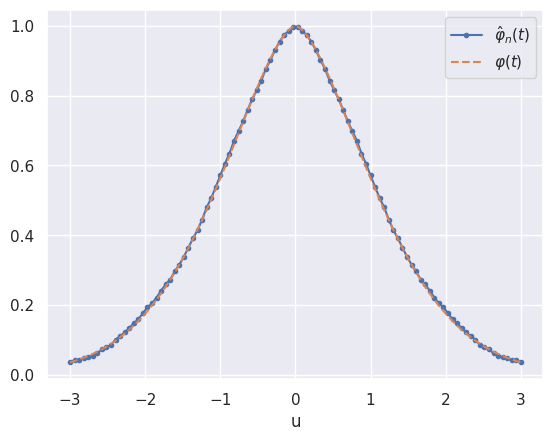

In [15]:
plt.plot(ts_1d, Z, ".-", label = "$\\hat \\varphi_n (t)$")
plt.plot(ts_1d, cf_1d(ts_1d, alpha, sigma), "--", label = "$\\varphi (t)$")

plt.xlabel("u")
plt.legend()

# plt.savefig("latex/images/stable_CF.png")
plt.show()

## 2d

In [16]:
n = 1000
dt = 0.05
tmin = 0.5
tmax = 2
alpha = 1.6
beta = 1
gamma = np.cos(pi*alpha/4)**(2/alpha)
delta = 0
sigma = 1
d = 2

Xs_2d = sub_gaussian_SaS(alpha, beta, gamma, delta, sigma, size=[n, d])

In [23]:
xn = 100
yn = 100
lim = 3
xs = np.linspace(-lim, lim, xn)
ys = np.linspace(-lim, lim, yn)
ts_2d = np.array([ [x,y] for x in xs  for y in ys])
XY, Z = gen_ecf(Xs_2d, ts_2d)
xx,yy = np.meshgrid(xs, ys)
f = np.reshape(Z, (xn, yn)).T
teo_cf = np.reshape(cf_2d(ts_2d, alpha, sigma),(xn, yn)).T

(-3.0, 3.0)

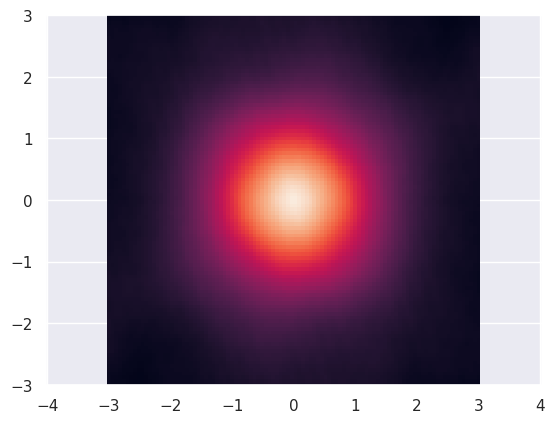

In [18]:
plt.pcolormesh(xx, yy, np.real(f))
lim = lim
plt.axis('equal')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

/home/olek/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


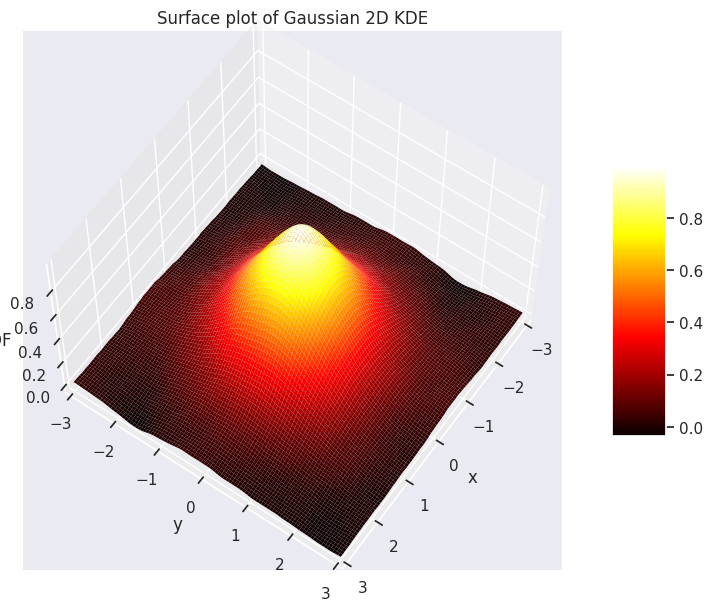

In [10]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()